# Pycaret Pipeline:
## Grandmother's Movies from Capstone

In [1]:
from pycaret.classification import *
 
import pandas as pd
import numpy as np

In [2]:
capstone1 = pd.read_csv('./finalprojects/MoviesML.csv')
capstone1.head()

,tconst,primaryTitle,originalTitle,startYear,Awards,Nominations,genreID,genres,WesternYN,FantasyYN,...,ActionYN,RomanceYN,ThrillerYN,AdventureYN,ScifiYN,DocumentaryYN,MysteryYN,AnimationYN,BiographyYN,GMovies
0,tt0000009,Miss Jerry,Miss Jerry,1894,NaN,NaN,1444,Romance,0,0,...,0,1,0,0,0,0,0,0,0,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,NaN,NaN,1058,"Documentary,News,Sport",0,0,...,0,0,0,0,0,1,0,0,0,NaN
2,tt0000502,Bohemios,Bohemios,1905,NaN,NaN,1,\N,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,NaN,NaN,15,"Action,Adventure,Biography",0,0,...,1,0,0,1,0,0,0,0,1,NaN
4,tt0000591,The Prodigal Son,L'enfant prodigue,1907,NaN,NaN,1081,Drama,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [3]:
#Need to fill in the null values

In [4]:
capstone1.shape

(631670, 30)

In [5]:
capstone1.describe()

,Nominations,genreID,WesternYN,FantasyYN,HorrorYN,DramaYN,WarYN,FamilyYN,HistoryYN,ComedyYN,...,ActionYN,RomanceYN,ThrillerYN,AdventureYN,ScifiYN,DocumentaryYN,MysteryYN,AnimationYN,BiographyYN,GMovies
count,883.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,...,631670.00000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,631670.000000,556.000000
mean,4.677237,802.881509,0.012912,0.023864,0.057685,0.364589,0.014598,0.027734,0.022415,0.170412,...,0.08463,0.074210,0.069902,0.044148,0.021769,0.191681,0.026571,0.014137,0.027115,1.001799
std,3.209081,447.461769,0.112894,0.152625,0.233147,0.481315,0.119936,0.164211,0.148030,0.375994,...,0.27833,0.262112,0.254982,0.205424,0.145929,0.393624,0.160826,0.118056,0.162420,0.042409
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,632.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,1081.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,14.000000,1479.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
capstone1.isna().sum()

tconst                0
primaryTitle          0
originalTitle         0
startYear             0
Awards           630787
Nominations      630787
genreID               0
genres                0
WesternYN             0
FantasyYN             0
HorrorYN              0
DramaYN               0
WarYN                 0
FamilyYN              0
HistoryYN             0
ComedyYN              0
MusicalYN             0
CrimeYN               0
MusicYN               0
SportYN               0
ActionYN              0
RomanceYN             0
ThrillerYN            0
AdventureYN           0
ScifiYN               0
DocumentaryYN         0
MysteryYN             0
AnimationYN           0
BiographyYN           0
GMovies          631114
dtype: int64

In [7]:
capstone1_copy = capstone1.copy()
capstone1_copy.head()

,tconst,primaryTitle,originalTitle,startYear,Awards,Nominations,genreID,genres,WesternYN,FantasyYN,...,ActionYN,RomanceYN,ThrillerYN,AdventureYN,ScifiYN,DocumentaryYN,MysteryYN,AnimationYN,BiographyYN,GMovies
0,tt0000009,Miss Jerry,Miss Jerry,1894,NaN,NaN,1444,Romance,0,0,...,0,1,0,0,0,0,0,0,0,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,NaN,NaN,1058,"Documentary,News,Sport",0,0,...,0,0,0,0,0,1,0,0,0,NaN
2,tt0000502,Bohemios,Bohemios,1905,NaN,NaN,1,\N,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,NaN,NaN,15,"Action,Adventure,Biography",0,0,...,1,0,0,1,0,0,0,0,1,NaN
4,tt0000591,The Prodigal Son,L'enfant prodigue,1907,NaN,NaN,1081,Drama,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [8]:
capstone2 = capstone1_copy.fillna(0)
capstone2.head()

,tconst,primaryTitle,originalTitle,startYear,Awards,Nominations,genreID,genres,WesternYN,FantasyYN,...,ActionYN,RomanceYN,ThrillerYN,AdventureYN,ScifiYN,DocumentaryYN,MysteryYN,AnimationYN,BiographyYN,GMovies
0,tt0000009,Miss Jerry,Miss Jerry,1894,0,0.0,1444,Romance,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,0,0.0,1058,"Documentary,News,Sport",0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,tt0000502,Bohemios,Bohemios,1905,0,0.0,1,\N,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,0,0.0,15,"Action,Adventure,Biography",0,0,...,1,0,0,1,0,0,0,0,1,0.0
4,tt0000591,The Prodigal Son,L'enfant prodigue,1907,0,0.0,1081,Drama,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [9]:
capstone2.isna().sum()

tconst           0
primaryTitle     0
originalTitle    0
startYear        0
Awards           0
Nominations      0
genreID          0
genres           0
WesternYN        0
FantasyYN        0
HorrorYN         0
DramaYN          0
WarYN            0
FamilyYN         0
HistoryYN        0
ComedyYN         0
MusicalYN        0
CrimeYN          0
MusicYN          0
SportYN          0
ActionYN         0
RomanceYN        0
ThrillerYN       0
AdventureYN      0
ScifiYN          0
DocumentaryYN    0
MysteryYN        0
AnimationYN      0
BiographyYN      0
GMovies          0
dtype: int64

In [10]:
capstone2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631670 entries, 0 to 631669
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         631670 non-null  object 
 1   primaryTitle   631670 non-null  object 
 2   originalTitle  631670 non-null  object 
 3   startYear      631670 non-null  object 
 4   Awards         631670 non-null  object 
 5   Nominations    631670 non-null  float64
 6   genreID        631670 non-null  int64  
 7   genres         631670 non-null  object 
 8   WesternYN      631670 non-null  int64  
 9   FantasyYN      631670 non-null  int64  
 10  HorrorYN       631670 non-null  int64  
 11  DramaYN        631670 non-null  int64  
 12  WarYN          631670 non-null  int64  
 13  FamilyYN       631670 non-null  int64  
 14  HistoryYN      631670 non-null  int64  
 15  ComedyYN       631670 non-null  int64  
 16  MusicalYN      631670 non-null  int64  
 17  CrimeYN        631670 non-nul

In [11]:
capstone2['GMovies'].value_counts()

0.0    631114
1.0       555
2.0         1
Name: GMovies, dtype: int64

In [12]:
capstone2['GMovies'].replace(to_replace = 2.0, value = 1.0, inplace = True)

In [13]:
capstone2['GMovies'].value_counts()

0.0    631114
1.0       556
Name: GMovies, dtype: int64

In [14]:
s = setup(capstone2, target = 'GMovies', session_id=4832)

,Description,Value
0,Session id,4832
1,Target,GMovies
2,Target type,Binary
3,Original data shape,"(631670, 30)"
4,Transformed data shape,"(631670, 30)"
5,Transformed train set shape,"(442169, 30)"
6,Transformed test set shape,"(189501, 30)"
7,Numeric features,23
8,Categorical features,6
9,Preprocess,True


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [16]:
best = compare_models(include = ['lr','gbc', 'lda', 'xgboost', 'lightgbm'], fold = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9991,0.9174,0.0051,0.3214,0.0101,0.0100,0.0388,10.3900
xgboost,Extreme Gradient Boosting,0.9991,0.8700,0.0051,0.3333,0.0101,0.0101,0.0413,9.6100
gbc,Gradient Boosting Classifier,0.9989,0.5473,0.0462,0.1891,0.0657,0.0653,0.0845,9.5100
lightgbm,Light Gradient Boosting Machine,0.9978,0.3625,0.0180,0.3034,0.0202,0.0195,0.0532,10.8650
lda,Linear Discriminant Analysis,0.9942,0.9137,0.2573,0.0419,0.0716,0.0702,0.1013,8.8700


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

### Explanation of the information thus far

This dataset is not a great fit for using with Pycaret because predicting based on the movies that my grandmother already owns is too small of a sample size to give an accurate prediction model. Her movie collection is 556 movies versus the movie set that is 631670. Since her collection makes up less than 1% of the total data within the set, the accuracy may seem like a very positive result of 99% but the other measurments are all over the place. Recall is very low, the precision is also extremely low and the F1, which measures a model's accuracy, shows it is accurate 7% of the time at the most.

I had initially wanted to do an analysis of this dataset in Pycaret for my capstone but as we can see in this breakdown, using PowerBI and discussing the specifics of her movie collection in visualizations was the best option overall.

#### I had to limit the folds of this dataset to 2 because my computer cannot handle running more than this number of models and this number of folds. Otherwise it uses 100% of my CPU.

In [17]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4832, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [18]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

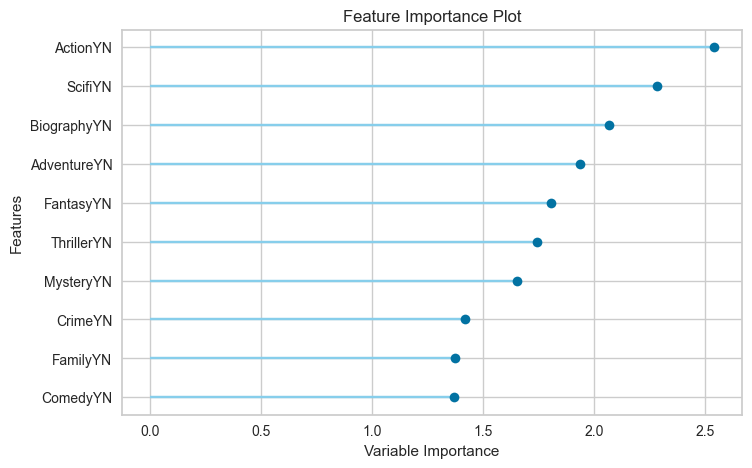

In [19]:
plot_model(best, plot = 'feature')

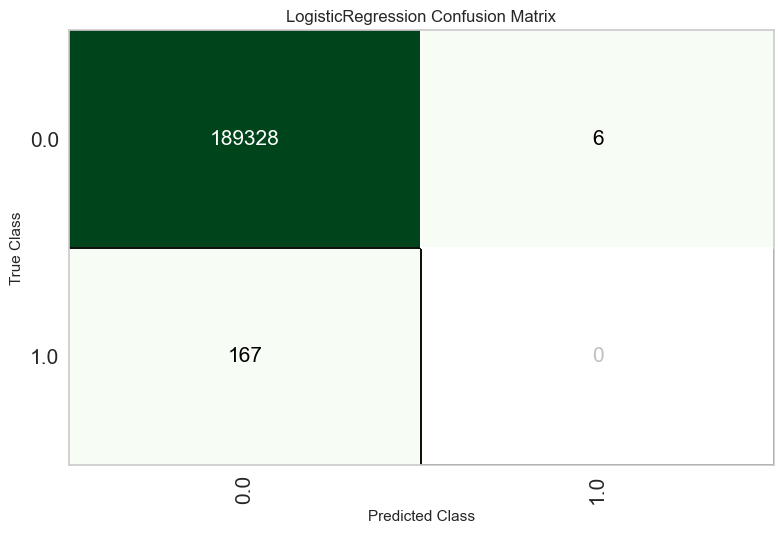

In [20]:
plot_model(best, plot = 'confusion_matrix')

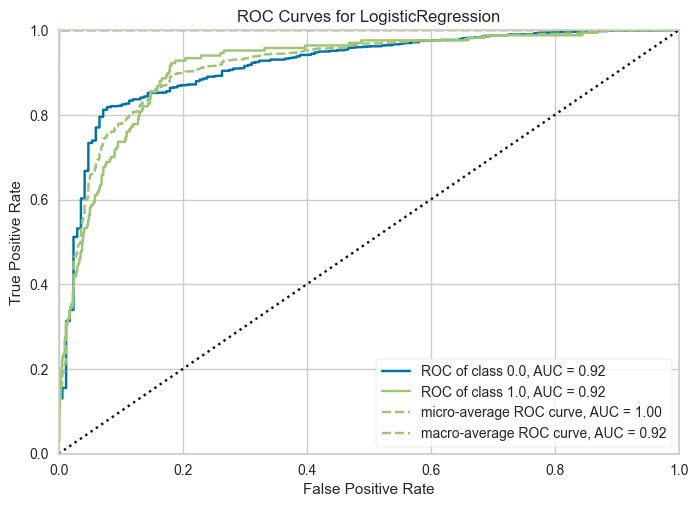

In [21]:
plot_model(best, plot = 'auc')

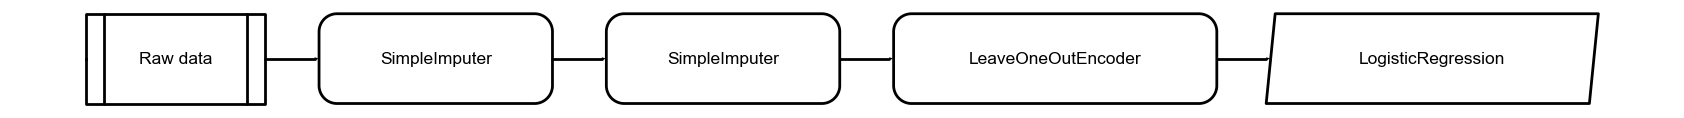

In [22]:
plot_model(best, plot = 'pipeline')

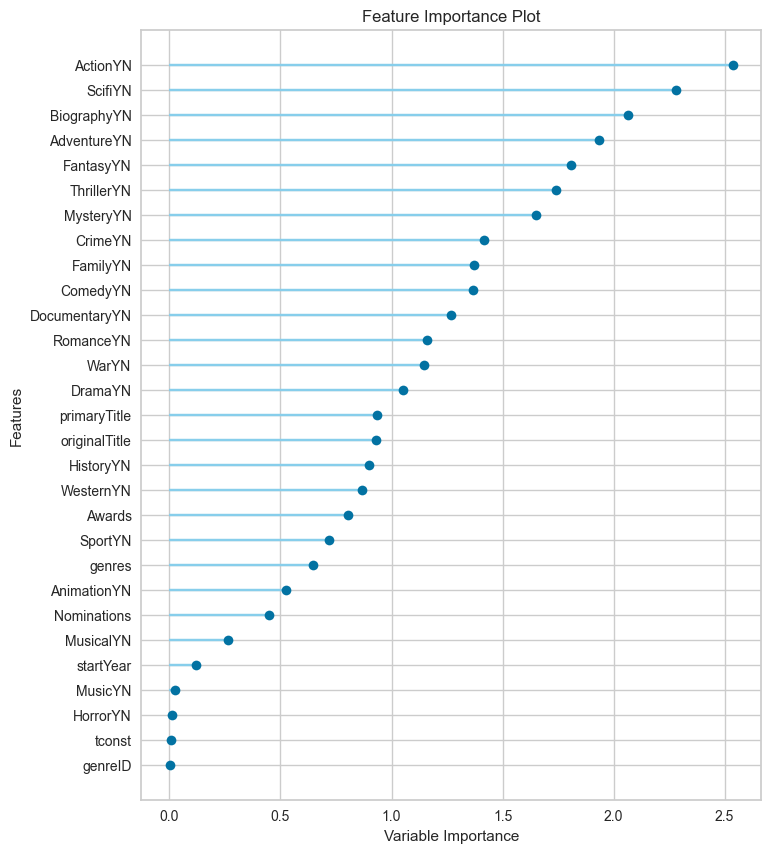

In [23]:
plot_model(best, plot = 'feature_all')

In [26]:
predict = predict_model(best)
predict

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9991,0.9164,0.0000,0.0000,0.0000,-0.0001,-0.0002


,tconst,primaryTitle,originalTitle,startYear,Awards,Nominations,genreID,genres,WesternYN,FantasyYN,...,ThrillerYN,AdventureYN,ScifiYN,DocumentaryYN,MysteryYN,AnimationYN,BiographyYN,GMovies,prediction_label,prediction_score
419001,tt2396721,The Scribbler,The Scribbler,2014,0,0.0,1424,"Mystery,Sci-Fi,Thriller",0,0,...,1,0,1,0,1,0,0,0.0,0,0.9844
469736,tt5591456,Hardwired,Hardwired,\N,0,0.0,1187,"Drama,Thriller",0,0,...,1,0,0,0,0,0,0,0.0,0,0.9992
258789,tt12268116,Blaxpride: The Legendary Black Ninja,Blaxpride: The Legendary Black Ninja,\N,0,0.0,86,"Action,Crime,Drama",0,0,...,0,0,0,0,0,0,0,0.0,0,0.9941
594404,tt6274132,Missing Biscuits,Missing Biscuits,\N,0,0.0,1415,Mystery,0,0,...,0,0,0,0,1,0,0,0.0,0,0.9997
441531,tt2450042,Sleeping on Dark Waters,Sleeping on Dark Waters,2008,0,0.0,731,"Comedy,Documentary",0,0,...,0,0,0,1,0,0,0,0.0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125148,tt0214754,Health in the Village,Health in the Village,1971,0,0.0,1,\N,0,0,...,0,0,0,0,0,0,0,0.0,0,1.0000
33671,tt0028725,Clipped Wings,Clipped Wings,1937,0,0.0,17,"Action,Adventure,Crime",0,0,...,0,1,0,0,0,0,0,0.0,0,0.9861
72843,tt0076271,Kingdom of the Spiders,Kingdom of the Spiders,1977,0,0.0,1361,"Horror,Sci-Fi",0,0,...,0,0,1,0,0,0,0,0.0,0,0.9995
146884,tt0295636,Stille Liebe,Stille Liebe,2001,0,0.0,1081,Drama,0,0,...,0,0,0,0,0,0,0,0.0,0,0.9999


In [27]:
predictions = predict_model(best, data=capstone2)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9991,0.9199,0.0072,0.2353,0.0140,0.0139,0.0410


,tconst,primaryTitle,originalTitle,startYear,Awards,Nominations,genreID,genres,WesternYN,FantasyYN,...,ThrillerYN,AdventureYN,ScifiYN,DocumentaryYN,MysteryYN,AnimationYN,BiographyYN,GMovies,prediction_label,prediction_score
0,tt0000009,Miss Jerry,Miss Jerry,1894,0,0.0,1444,Romance,0,0,...,0,0,0,0,0,0,0,0.0,0,0.9998
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,0,0.0,1058,"Documentary,News,Sport",0,0,...,0,0,0,1,0,0,0,0.0,0,1.0000
2,tt0000502,Bohemios,Bohemios,1905,0,0.0,1,\N,0,0,...,0,0,0,0,0,0,0,0.0,0,1.0000
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,0,0.0,15,"Action,Adventure,Biography",0,0,...,0,1,0,0,0,0,1,0.0,0,0.9738
4,tt0000591,The Prodigal Son,L'enfant prodigue,1907,0,0.0,1081,Drama,0,0,...,0,0,0,0,0,0,0,0.0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631665,tt8995254,Malcolm Is a Little Unwell,Malcolm Is a Little Unwell,2018,0,0.0,965,Documentary,0,0,...,0,0,0,1,0,0,0,0.0,0,1.0000
631666,tt8995256,Red Moon,Red Moon,2019,0,0.0,982,"Documentary,Family",0,0,...,0,0,0,1,0,0,0,0.0,0,0.9999
631667,tt8995258,Traces of Hope,Traces of Hope,2020,0,0.0,965,Documentary,0,0,...,0,0,0,1,0,0,0,0.0,0,1.0000
631668,tt8995262,The Meddler,El Metido,2020,0,0.0,878,"Crime,Documentary,Thriller",0,0,...,1,0,0,1,0,0,0,0.0,0,0.9997


In [32]:
save_model(predict, 'Predicted_Movies')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\mairi\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Nominations', 'genreID',
                                              'WesternYN', 'FantasyYN',
                                              'HorrorYN', 'DramaYN', 'WarYN',
                                              'FamilyYN', 'HistoryYN',
                                              'ComedyYN', 'MusicalYN', 'CrimeYN',
                                              'MusicYN', 'SportYN', 'ActionYN',
                                              'RomanceYN', 'ThrillerYN',
                                              'AdventureYN',...
 ...            ...          ...      ...            ...        ...   
 125148           0            0        0              0          0   
 33671            0            1        0              0          0   
 72843            0      